# Examen 2: Práctica Limpieza
- Jorge Emiliano Pomar 
- A01709338

# Preliminares
## Limpieza de datos
Inserta en el siguiente bloque todas las librerías que vayas a utilizar:

In [1]:
import pandas as pd
!pip install missingno
import missingno as msno
import matplotlib.pyplot as plt


## Carga de los datos
Carga el archivo [data.csv](https://drive.google.com/file/d/1-NHuf8Wj_-5kToDqCdgDpcwZT5h6fPBQ/view?usp=sharing) a un dataframe de pandas.

Nota: Si hay problemas con la codificación, prueba agregar el argumento `encoding="ISO-8859-1"`.

In [2]:
# lectura a DF
df = pd.read_csv('data.csv', encoding="ISO-8859-1")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Dataset Description:</font></h2>

| __Variable__   | __Description__ |
|     :---       |       :---      |      
| __InvoiceNo__  | Code representing each unique transaction.  If this code starts with letter 'c', it indicates a cancellation. |
| __StockCode__  | Code uniquely assigned to each distinct product. |
| __Description__| Description of each product. |
| __Quantity__   | The number of units of a product in a transaction. |
| __InvoiceDate__| The date and time of the transaction. |
| __UnitPrice__  | The unit price of the product in sterling. |
| __CustomerID__ | Identifier uniquely assigned to each customer. |
| __Country__    | The country of the customer. |


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Estadística descriptiva
Exploremos inicialmente los descriptores estadísticos de todas las variables:

In [5]:
# Summary statistics for categorical variables
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,541909,23260,10/31/2011 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


## Preguntas derivadas de la estadística descriptiva
Analiza y responde lo siguiente:
* `Quantity`
    * ¿Cuál es la cantidad promedio de productos por transacción?
    * Analiza el **rango** (i.e., diferencia entre el mínimo y máximo valor). Responde: ¿qué puede representar la existencia de cantidades negativas? ¿Qué podemos deducir del **rango**?
    * Analiza la desviación estándar, el máximo y percentil 75. ¿Podemos concluir la presencia de valores atípicos?
* `UnitPrice`
    * ¿Cuál es el precio por unidad promedio por transacción?
    * Analiza también el rango y el mínimo. ¿Qué podemos concluir de los valores negativos?
    * Considerando nuevamente el máximo y percentil 75, ¿podemos concluir la presencia de valores atípicos?
* `CustomerID`
    * ¿Hay valores nulos? Si es así, ¿cómo podemos manejarlos?
    * ¿Hay múltiples registros del mismo cliente?
* `InvoiceNo`
    * ¿Cuántas transacciones tenemos?
    * ¿Cuál es la orden con mayor cantidad de items?
* `StockCode`
    * ¿Cuántos productos únicos tenemos?
    * ¿Cuál es el producto que más veces aparece?
* `Description`
    * ¿Hay descripciones con valores nulos? Si es así, ¿cómo podemos manejarlo?
* `Country`
    * ¿De cuántos países se tiene registro de transacciones?
    * ¿Cuál es el país con mayor cantidad de transacciones?

    

<Axes: >

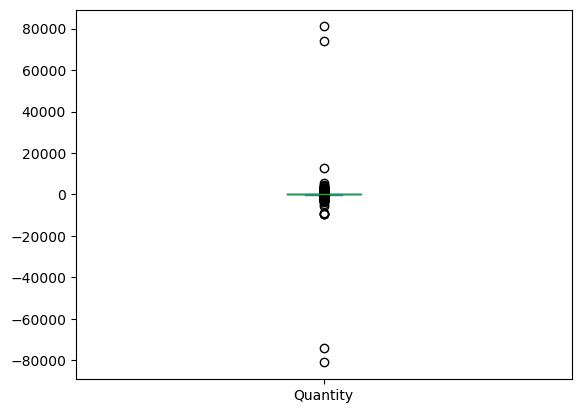

In [7]:
df['Quantity'].plot(kind= 'box')

In [8]:
altos = df['Quantity'] > 1
bajos = df['Quantity'] < 10

datos_atipicos = bajos | altos
datos_atipicos.sum()

541909

<Axes: >

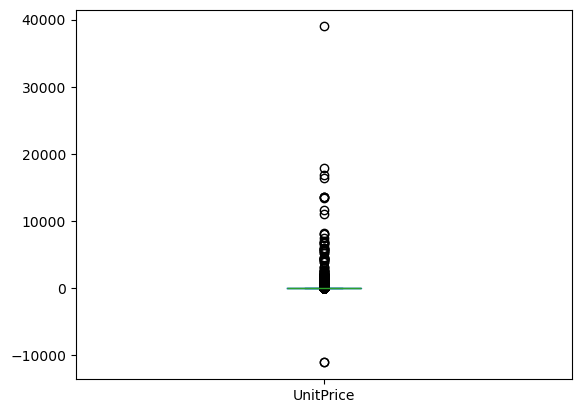

In [9]:
df['UnitPrice'].plot(kind= 'box')

In [10]:
df['UnitPrice'].mean()

4.611113626088513

In [11]:
df['UnitPrice'].describe().T

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

# Limpieza de datos
Este *dataset* se presta para realizar manejo de valores nulos, duplicados y *outliers*. Comencemos con valores nulos.

## Valores nulos
Comencemos con generar una gráfica para visualizar la prevalencia de valores nulos por columna (`msno.matrix()`).

<Axes: >

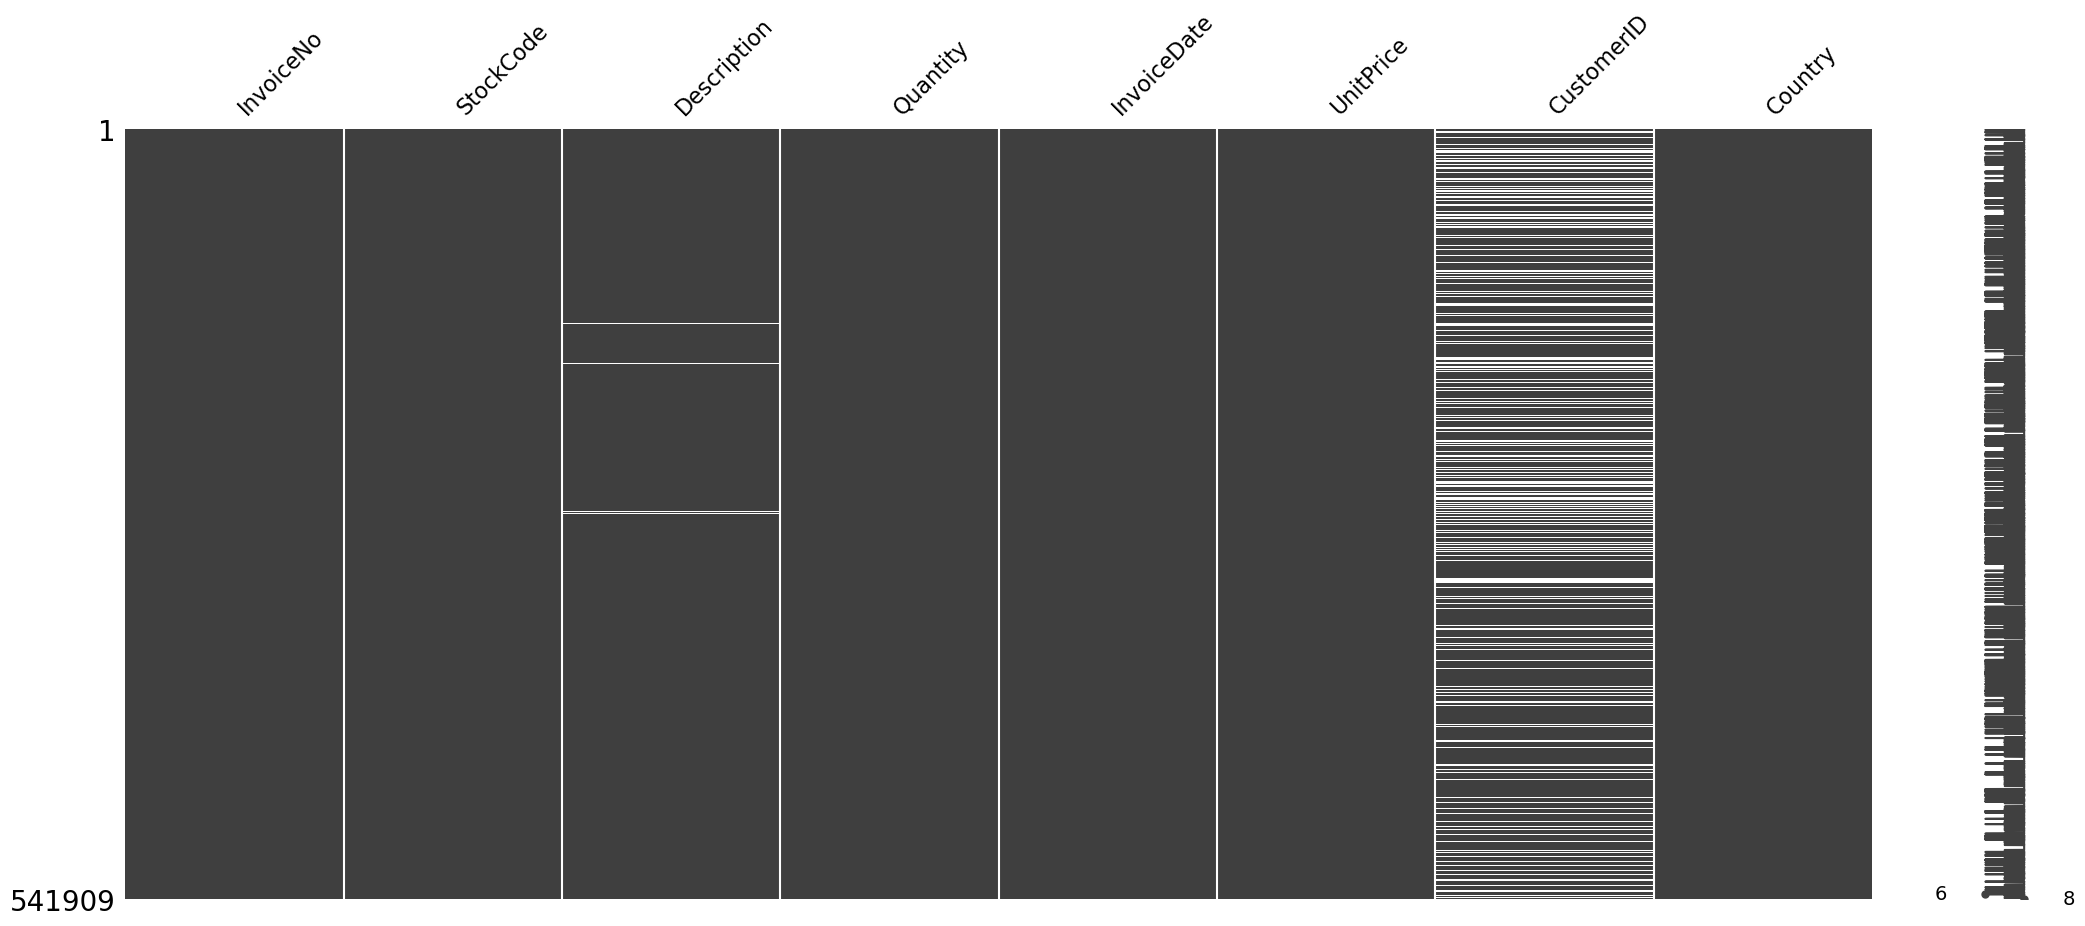

In [12]:
msno.matrix(df)

Ahora reporta los porcentajes de existencia de valores nulos.

In [13]:
df.isnull().sum()/df.shape[0]*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [14]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


A continuación, documenta aquí tu estrategia de manejo de valores nulos para cada variable.
Ejemplo:
* `Variable1` (15% valores faltantes): Dado que... procederemos a...
* `Variable2` (30% valores faltantes): Dado que... procederemos a...

- `Description`: tiene el 0.268311 % de datos faltantes, así que voy a reemplazar los datos nulos por un "No description" para que no pierda el tipo de dato y tampoco tengamos que eliminar toda la fila.
- `CustomerID`: Esta columna tiene muchos nulos. Específicamente el 24.92% faltante. Son las claves con lo que se identifican por lo que dice la descripción. Así que no tiene sentido analizar por valores atípicos con min y max porque solo es un número de identificación, es decir, puede ser un numero enorme o muy chiquito por la cantidad de empleados supongo. Pero sí podríamos manejar los nulos igualmente con una imputación. Reemplazando nulos por un ID genérico como 0000. Así no perdemos el tipo de dato pero al mismo tiempo tenemos un id con que trabajar.

In [15]:
limpio_df = df.copy()
limpio_df['Description'].fillna('No description', inplace=True)

C:\Users\pomar\AppData\Local\Temp\ipykernel_64760\842180392.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  limpio_df['Description'].fillna('No description', inplace=True)


In [16]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


Antes de proceder a realizar limpieza, muestra (filtra) algunos de los registros que procederán a manejar (por ejemplo: eliminar ó imputar).

Guarda estos datos en otro dataframe.

In [17]:
df['CustomerID'].describe()

count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64

In [18]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


Implementa a continuación tu estrategia de manejo de valores nulos.

In [19]:

limpio_df['CustomerID'].fillna(0000, inplace=True)


C:\Users\pomar\AppData\Local\Temp\ipykernel_64760\2795913184.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  limpio_df['CustomerID'].fillna(0000, inplace=True)


In [20]:
limpio_df = df[df['CustomerID'].isnull() | df['Description'].isnull()]

In [41]:
print(limpio_df.shape)

(135080, 8)


Finalmente, comprueba a continuación el correcto manejo de nulos mostrando la suma total de valores nulos en el dataframe.

In [22]:
limpio_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [23]:
df.dropna(subset=['CustomerID', 'Description'], inplace=True)

In [24]:
df.shape[1]

8

In [25]:
df.shape[0]

406829

In [26]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Valores duplicados
Procedamos a explorar e identificar valores duplicados en el dataset.

1. Crea una Serie llamada `duplicate_rows` que contenga **todas** las filas repetidas (incluyendo la primer y última ocurrencia).
2. De ese dataframe, ordena los datos en orden ascendente en el siguiente orden: `['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity']`.
3. Imprime la forma del dataframe con duplicados y ordenado y responde.
4. Eliminarás del dataframe df todos aquellos registros duplicados conservando solo la primer instancia. Pero antes de eso despliega la cantidad de filas a eliminar y escribela aquí.
5. Después de eliminar duplicados de df (conservando la primer instancia), indica aquí cuántas filas quedaron.

In [27]:
duplicate_rows = df[df.duplicated(keep=False)]


In [28]:
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

In [29]:
duplicate_rows_sorted

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
440149,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,11/4/2011 13:25,2.95,15110.0,United Kingdom
461407,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,11/13/2011 11:38,0.55,17838.0,United Kingdom
461408,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,11/13/2011 11:38,0.55,17838.0,United Kingdom
529980,C580764,22667,RECIPE BOX RETROSPOT,-12,12/6/2011 10:38,2.95,14562.0,United Kingdom


In [30]:
duplicate_rows_sorted.shape

(10062, 8)

Muestra la cantidad de duplicados a eliminar.

In [31]:
duplicate_rows_sorted.duplicated().sum()

5225

Implementa a continuación tu estrategia para valores duplicados y muestra la cantidad de registros (filas) que te quedaron.

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.shape[0]

401604

## Valores atípicos
Muestra a continuación un diagrama de cajas (boxplot) de las variables a analizar.

<Axes: >

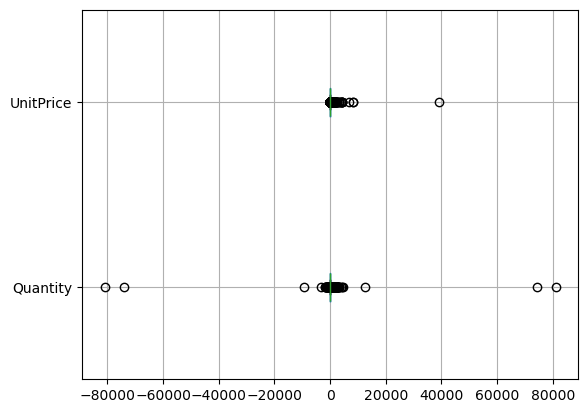

In [34]:
df[['Quantity', 'UnitPrice']].boxplot(vert=False)


Toma en cuenta que la variable `InvoiceNo` ha sido codificada de manera que las transacciones **canceladas** comienzan con la letra 'C' para identificar.
Por supuesto que esto debe considerarse antes de tratar *outliers*. Responde, ¿porqué nos afectará en el análisis posterior?

- Respuesta: porque es un tipo texto por la letra. Para poder hacer un analisis posterior necesitamos sacar la media y la mediana al igual que el rango. 

Crea a continuación una columna llamada `Transaction_Status` donde las ordenes canceladas tendrán el valor `Cancelled` y el resto `Completed`.

In [35]:
df['Transaction_Status'] = df['InvoiceNo'].str.contains(r'^C', regex=True).replace({True: 'Cancelled', False: 'Completed'})

Muestra el porcentaje de transacciones canceladas.

In [36]:
porcentaje_c = (df['Transaction_Status'] == "Cancelled").sum() / df.shape[0]*100
porcentaje_c

2.209141343213713

Tomando en cuenta que solo debemos utilizar registros de transacciones **completadas**, filtra estos registros a otro dataframe llamado `df_cln`. En este, realizaremos tratamiento de datos atípicos (outliers) según el enfoque de **IQR** (*Interquartile Range* o Rango Intercuartílico) para las variables `Quantity` y `UnitPrice`.

Después de implementarlo, indica aquí la cantidad de filas resultantes en el *dataframe*.

Incorpora a continuación dicha estrategia y muestra los estadísticos descriptivos resultantes.

In [37]:
df_cln = df[df['Transaction_Status'] == 'Completed'].copy()

q1 = df_cln['Quantity'].quantile(0.25)
q2 = df_cln['Quantity'].quantile(0.75)
iqr = q2 - q1

In [38]:
df_cln = df_cln[(df_cln['Quantity'] >= (q1 - 1.5 * iqr)) & (df_cln['Quantity'] <= (q2 + 1.5 * iqr))]



In [39]:
unitpriceq1 = df_cln['UnitPrice'].quantile(0.25)
unitpriceq2 = df_cln['UnitPrice'].quantile(0.75)
unitpriceiqr = unitpriceq2 - unitpriceq1



In [40]:
df_cln = df_cln[(df_cln['UnitPrice'] >= (unitpriceq1 - 1.5 * unitpriceiqr)) & (df_cln['UnitPrice'] <= (unitpriceq2 + 1.5 * unitpriceiqr))]

df_cln.shape[0]

333265